

---


# 📊 Proyecto de Análisis de Sentimientos de Tweets

## 🎯 Problema de Negocio

El objetivo de este proyecto es analizar los sentimientos de los tweets, identificando si los mensajes son positivos o negativos. Utilizando un conjunto de datos de 1,600,000 tweets preprocesados, se pretende generar diversas características que se utilizarán para entrenar un modelo de clasificación.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datatotal.csv')

vamos a descartar la columna stopword_count ya que en si estas palabras no nos aportan valor al modelo y tampoco su conteo.

In [ ]:
df = df.drop(columns=['stopword_count'])

In [ ]:
X = df.drop(columns=['Unnamed: 0', 'target', 'text', 'cleaned_text'])
y = df['target']

In [ ]:
# Verificar las dimensiones de las variables
print(f"Dimensión de X (variables predictoras): {X.shape}")
print(f"Dimensión de y (variable objetivo): {y.shape}")

Dimensión de X (variables predictoras): (1505981, 14)
Dimensión de y (variable objetivo): (1505981,)


In [ ]:
# Primero, dividir en train (70%) y test (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=101)

# Ahora dividir X_temp en test (50%) y validation (50%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, random_state=101)

# Verificar las dimensiones después del split
print(f"Conjunto de entrenamiento (train): {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba (test): {X_test.shape}, {y_test.shape}")
print(f"Conjunto de validación (validation): {X_val.shape}, {y_val.shape}")

Conjunto de entrenamiento (train): (1054186, 14), (1054186,)
Conjunto de prueba (test): (225897, 14), (225897,)
Conjunto de validación (validation): (225898, 14), (225898,)


## Análisis Exploratorio

In [ ]:
df["target"].unique()

array([0, 4])

In [ ]:
def analisis_exploratorio():
    fig, axs = plt.subplots(3, 2, figsize=(24, 18)) # Ajusta el número de subplots y el tamaño de la figura según tus necesidades

    sns.histplot(X_train["capital_word_density"], kde=True, ax=axs[0, 0], color='skyblue')
    axs[0, 0].set_xlabel("capital_word_density", fontsize=18)
    axs[0, 0].set_ylabel("Frecuencia", fontsize=18)

    sns.histplot(X_train["repeated_word_proportion"], kde=True, ax=axs[0, 1], color='olive')
    axs[0, 1].set_xlabel("repeated_word_proportion", fontsize=18)
    axs[0, 1].set_ylabel("Frecuencia", fontsize=18)

    sns.histplot(X_train["avg_word_length"], kde=True, ax=axs[1, 0], color='gold')
    axs[1, 0].set_xlabel("avg_word_length", fontsize=18)
    axs[1, 0].set_ylabel("Frecuencia", fontsize=18)

    sns.histplot(X_train["tweet_length"], kde=True, ax=axs[1, 1], color='teal')
    axs[1, 1].set_xlabel("tweet_length", fontsize=18)
    axs[1, 1].set_ylabel("Frecuencia", fontsize=18)

    # Gráfico de barras para y_train
    sns.countplot(x=y_train, ax=axs[2, 0], palette='tab10')
    axs[2, 0].set_xlabel("target", fontsize=18)
    axs[2, 0].set_ylabel("Frecuencia", fontsize=18)

    # Eliminamos el último subplot vacío
    fig.delaxes(axs[2,1])

    plt.tight_layout()
    plt.show()

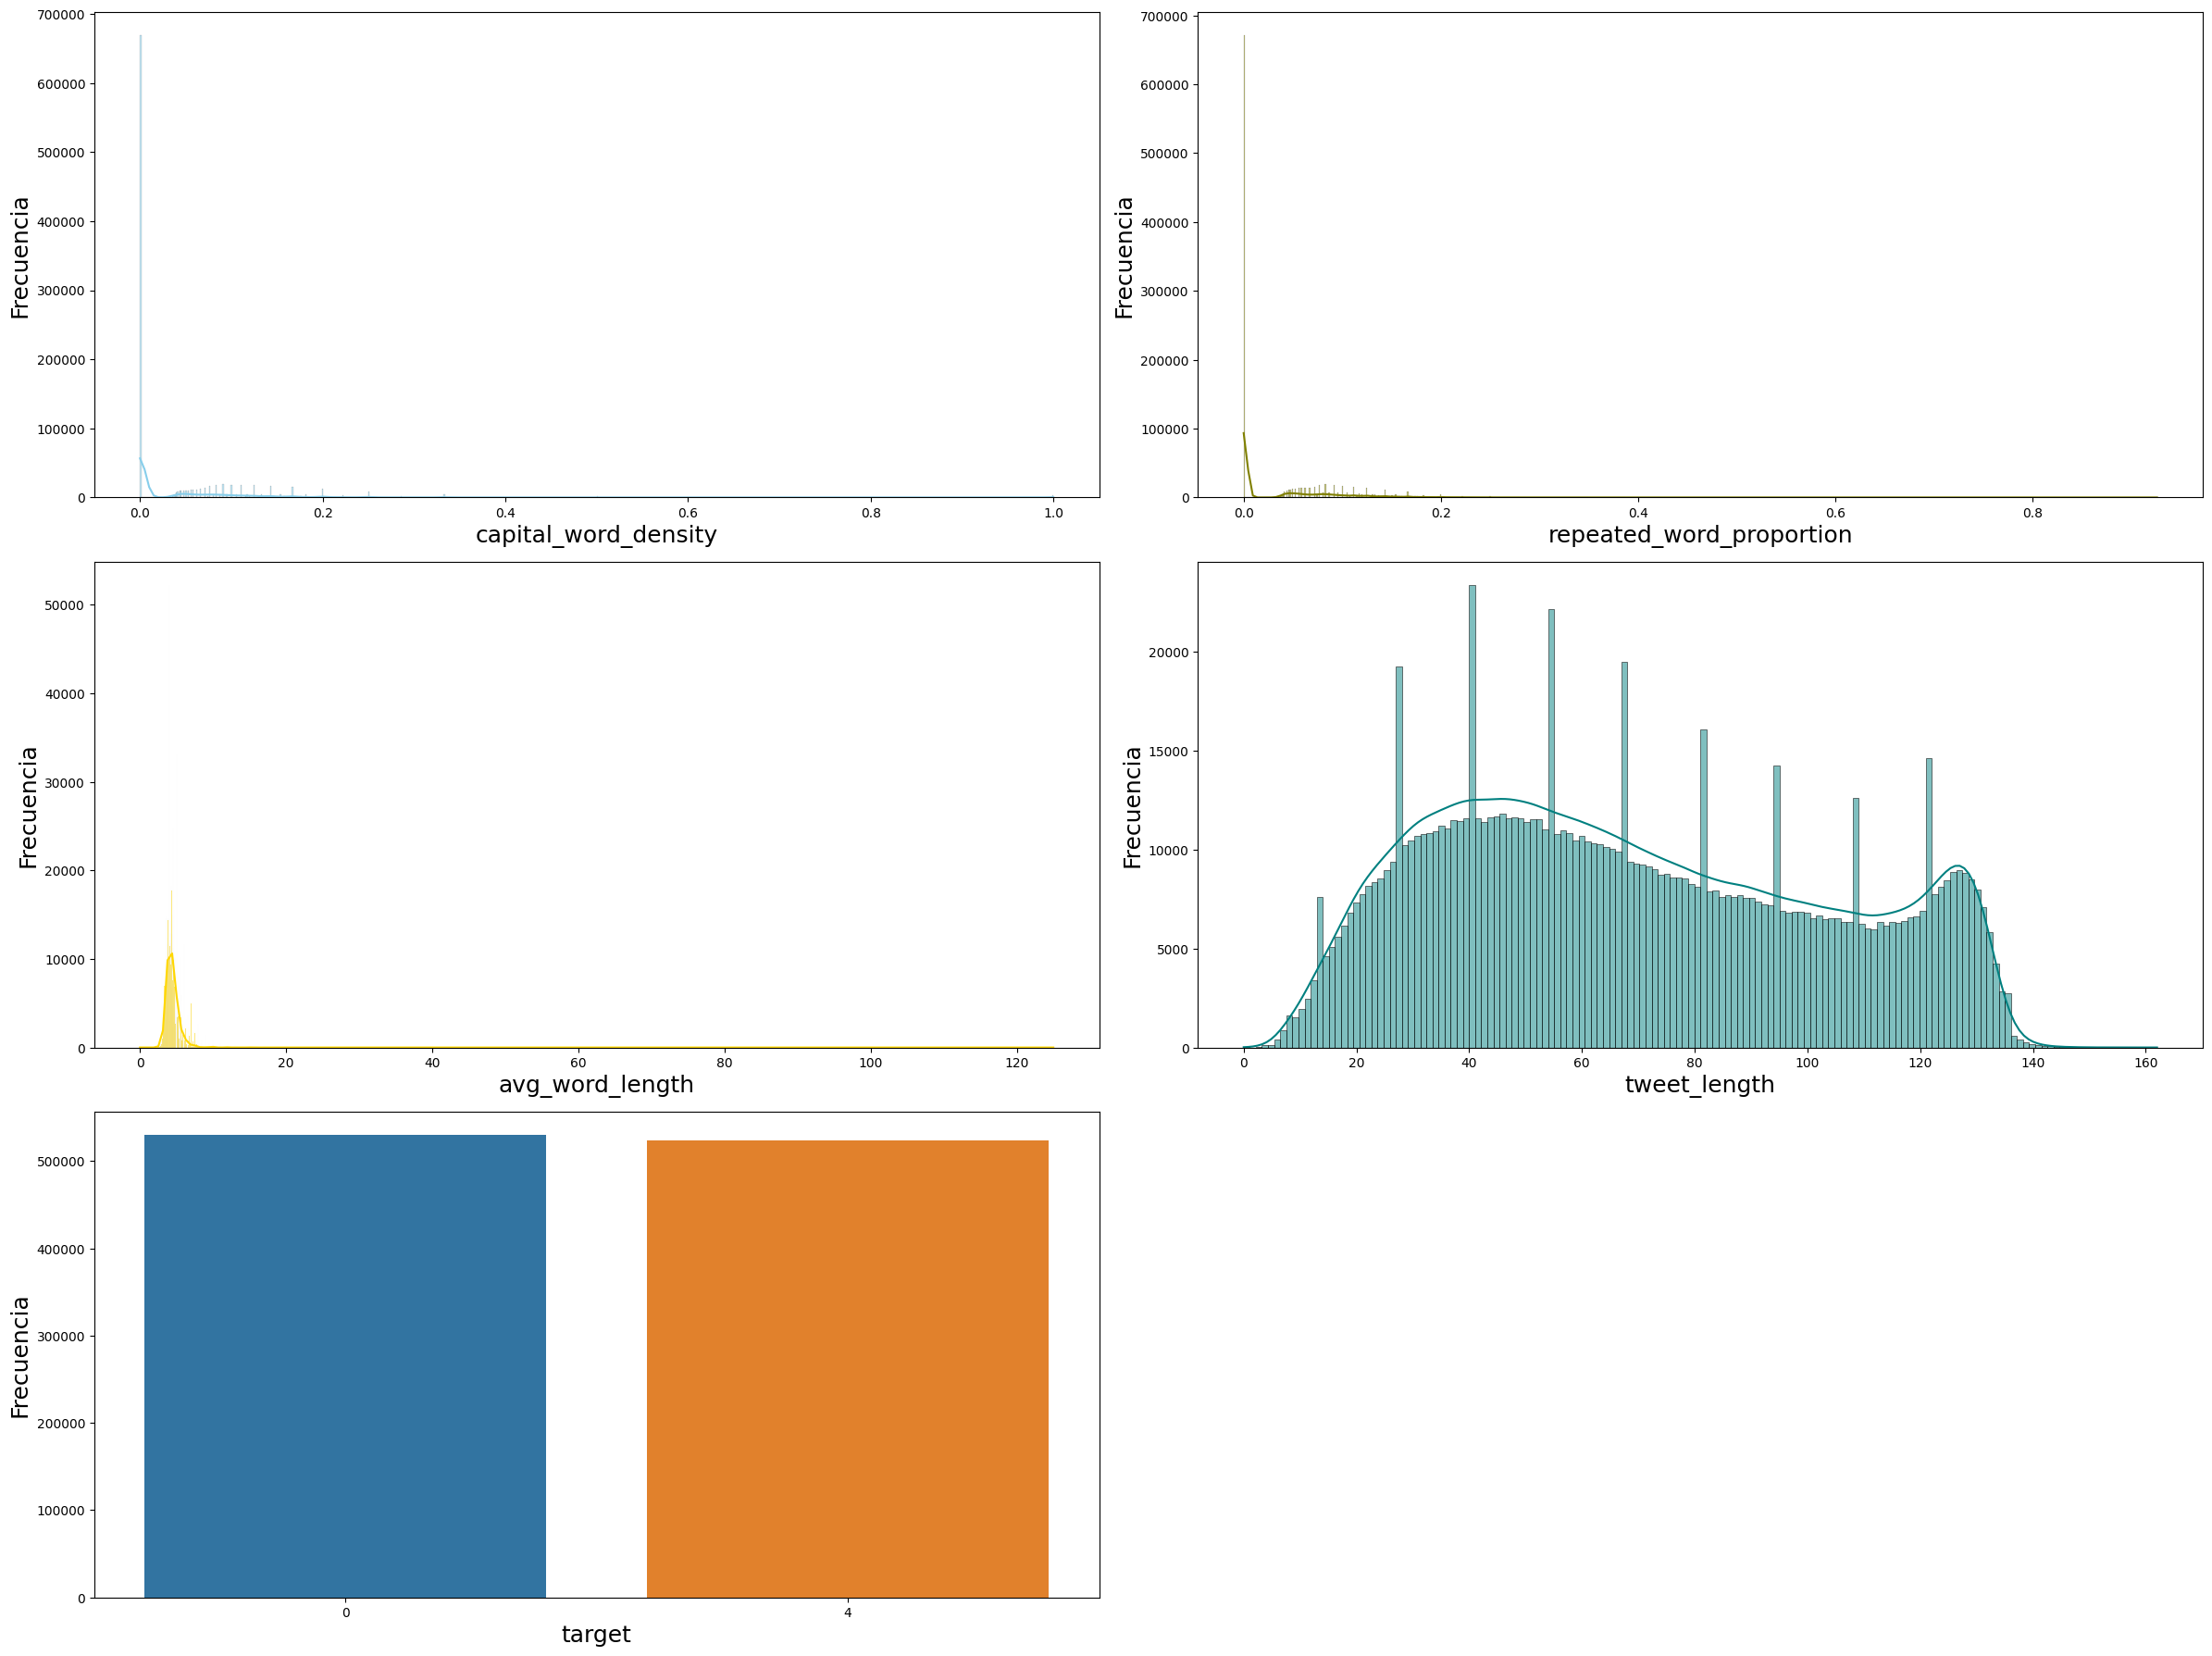

In [ ]:
analisis_exploratorio()

Observando los gráficos podemos determinar que:

1.  Tenemos más de 650mil tweets con 0 palabras en mayusculas dentro de todo nuestro data set.
2.   La cantidad de tweets con 0 palabras repetidas es más de 650mil.
3.   En promedio el tamaño de las palabras que se encuentran por tweets se encuentra entre 0 y 10.
4.   La mayoría de tweets están concentrados en la parte más corta del rango de longitud es decir entre 0 y 80. Encontramos algunos picos en distintas longitudes, aproximadamente en 27,41, 64 y otros puntos más.
5. Las clases 0 y 4 de la variable a predecir(target/objetivo) están aproximadamente balanceadas.





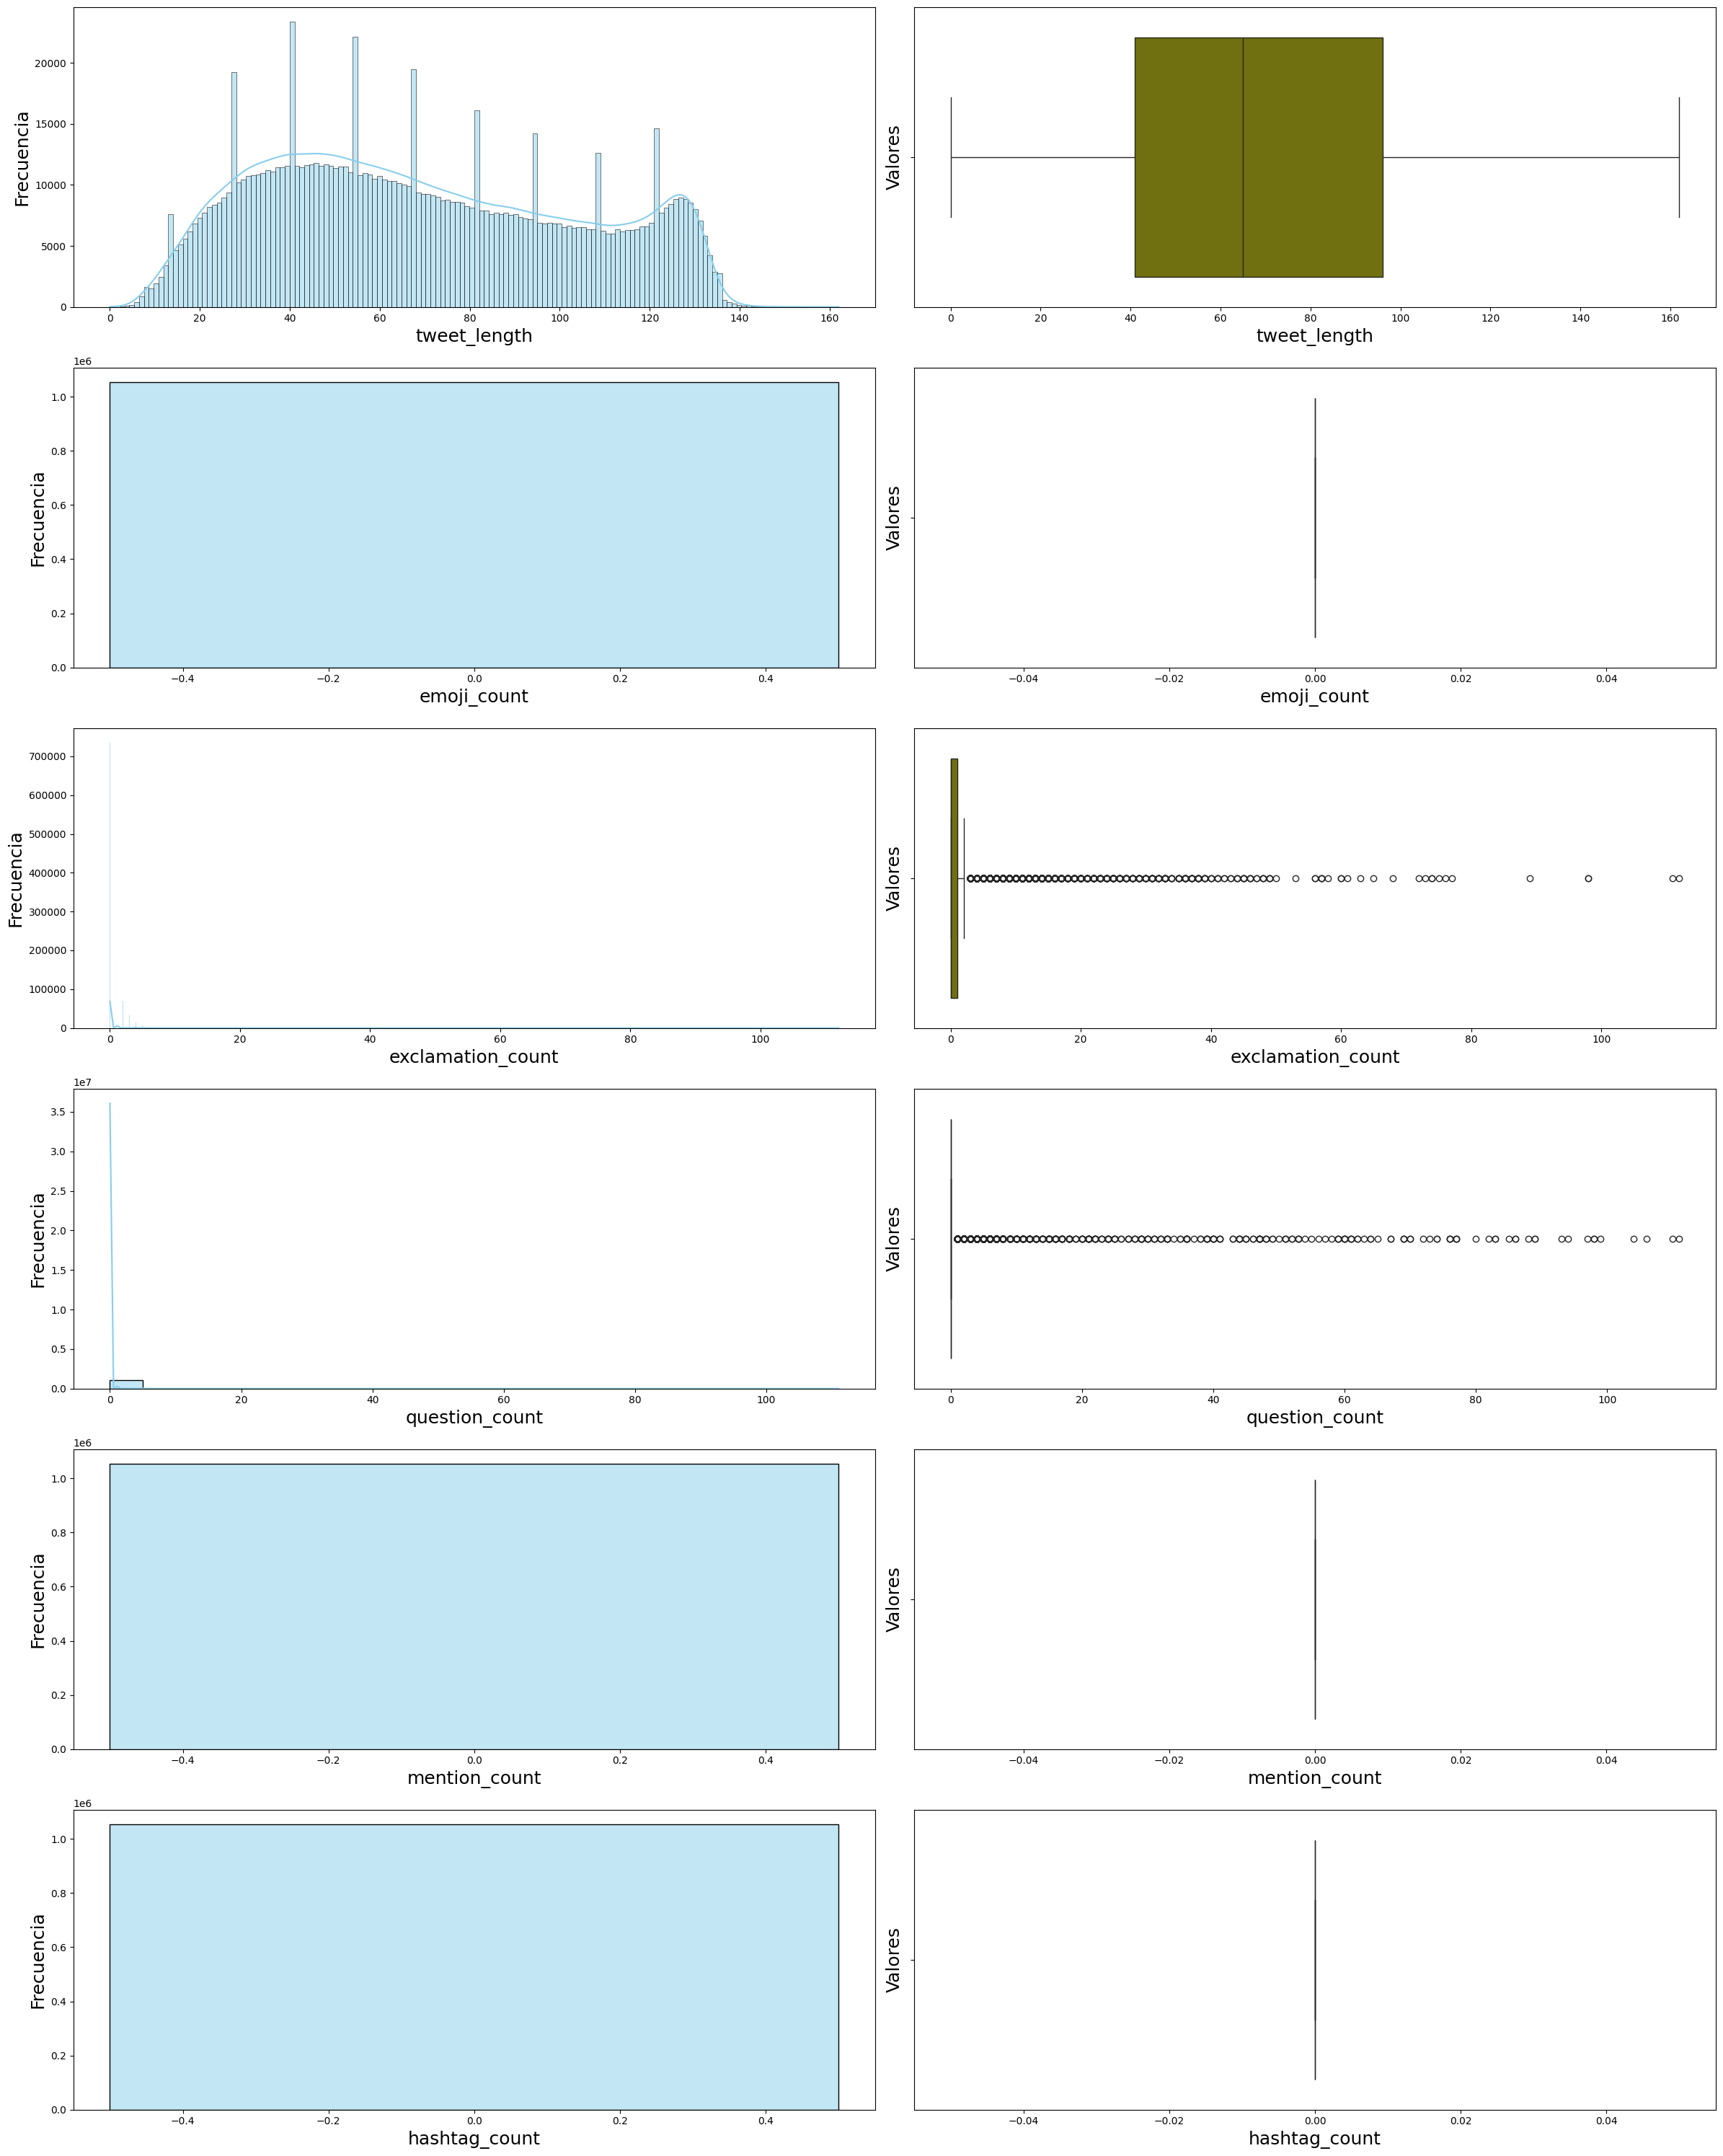

In [ ]:
# @title
def analisis_exploratorio():
    columnas = [
        "tweet_length", "emoji_count", "exclamation_count", "question_count",
        "mention_count", "hashtag_count"
    ]

    fig, axs = plt.subplots(len(columnas), 2, figsize=(24, 5 * len(columnas)))  # Ajusta el tamaño de la figura según tus necesidades

    for i, columna in enumerate(columnas):
        sns.histplot(X_train[columna], kde=True, ax=axs[i, 0], color='skyblue')
        axs[i, 0].set_xlabel(columna, fontsize=18)
        axs[i, 0].set_ylabel("Frecuencia", fontsize=18)

        sns.boxplot(x=X_train[columna], ax=axs[i, 1], color='olive')
        axs[i, 1].set_xlabel(columna, fontsize=18)
        axs[i, 1].set_ylabel("Valores", fontsize=18)

    plt.tight_layout()
    plt.show()

analisis_exploratorio()

# Bivariado
# Matriz de Correlación

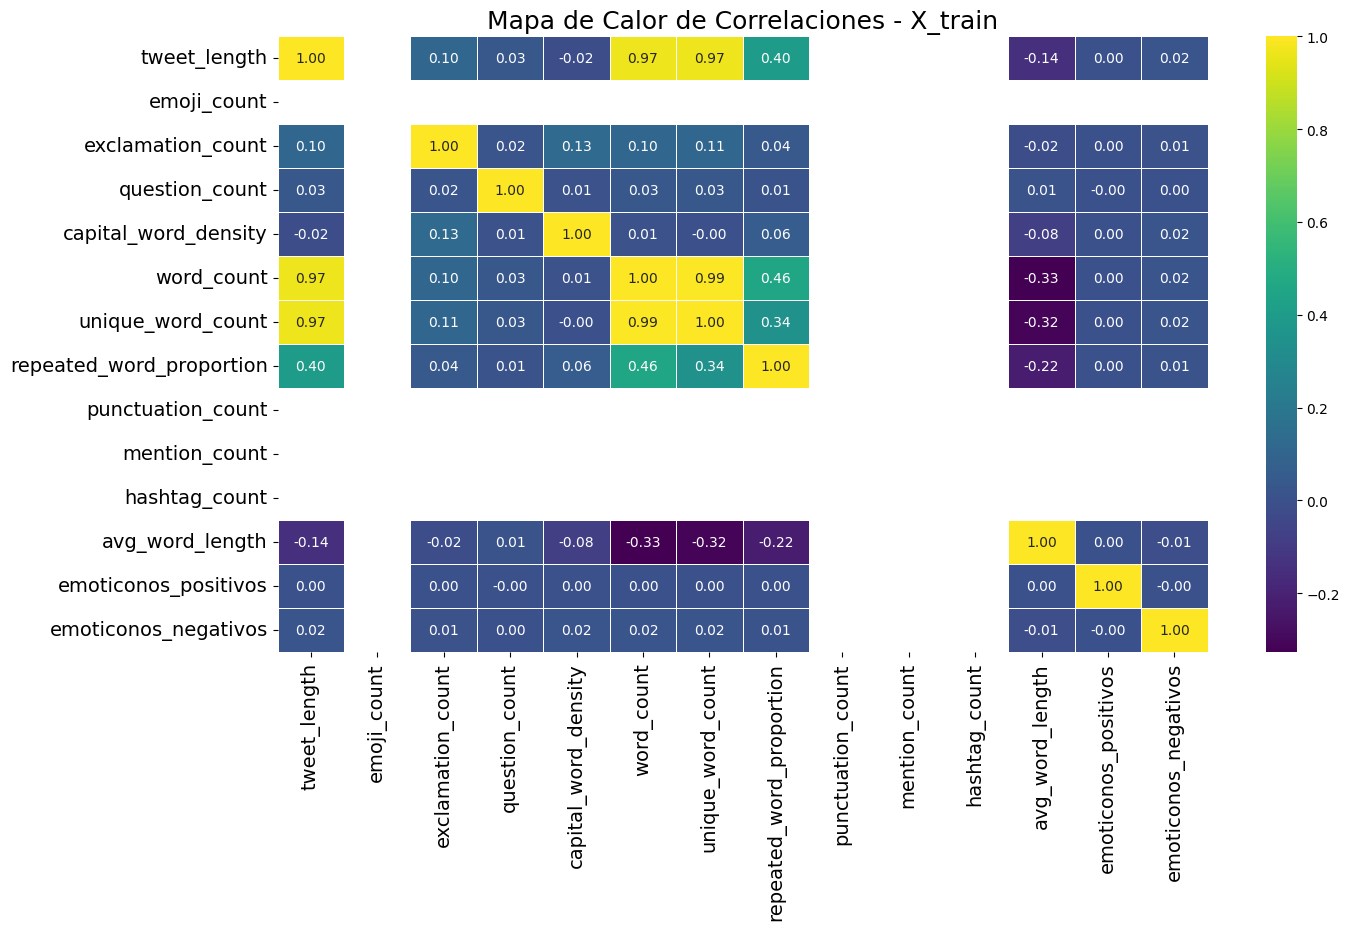

In [ ]:
def generar_mapa_calor(X_train):
    plt.figure(figsize=(15, 8))
    correlation_matrix = X_train.corr()
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
    heatmap.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Mapa de Calor de Correlaciones - X_train', fontsize=18)
    plt.show()

# Llamar a la función para generar el mapa de calor
generar_mapa_calor(X_train)

In [ ]:
for column in X_train.columns:
    print(f"{column}: {X_train[column].nunique()} valores únicos")

tweet_length: 158 valores únicos
emoji_count: 1 valores únicos
exclamation_count: 70 valores únicos
question_count: 89 valores únicos
capital_word_density: 284 valores únicos
word_count: 37 valores únicos
unique_word_count: 33 valores únicos
repeated_word_proportion: 236 valores únicos
punctuation_count: 1 valores únicos
mention_count: 1 valores únicos
hashtag_count: 1 valores únicos
avg_word_length: 1336 valores únicos
emoticonos_positivos: 2 valores únicos
emoticonos_negativos: 6 valores únicos


Observamos que hay columnas que están en blanco, si comparamos el gráfico con la cantidad de valores unicos que se encuentran en cada columnas, nos damos cuentas que las columnas con 1 solo valor unico es decir que es un valor constante en todos los registros, estas son las que están en blanco. Por ende vamos a realizar el mismo gráfico pero ahora sacando estás columnas del análisis.

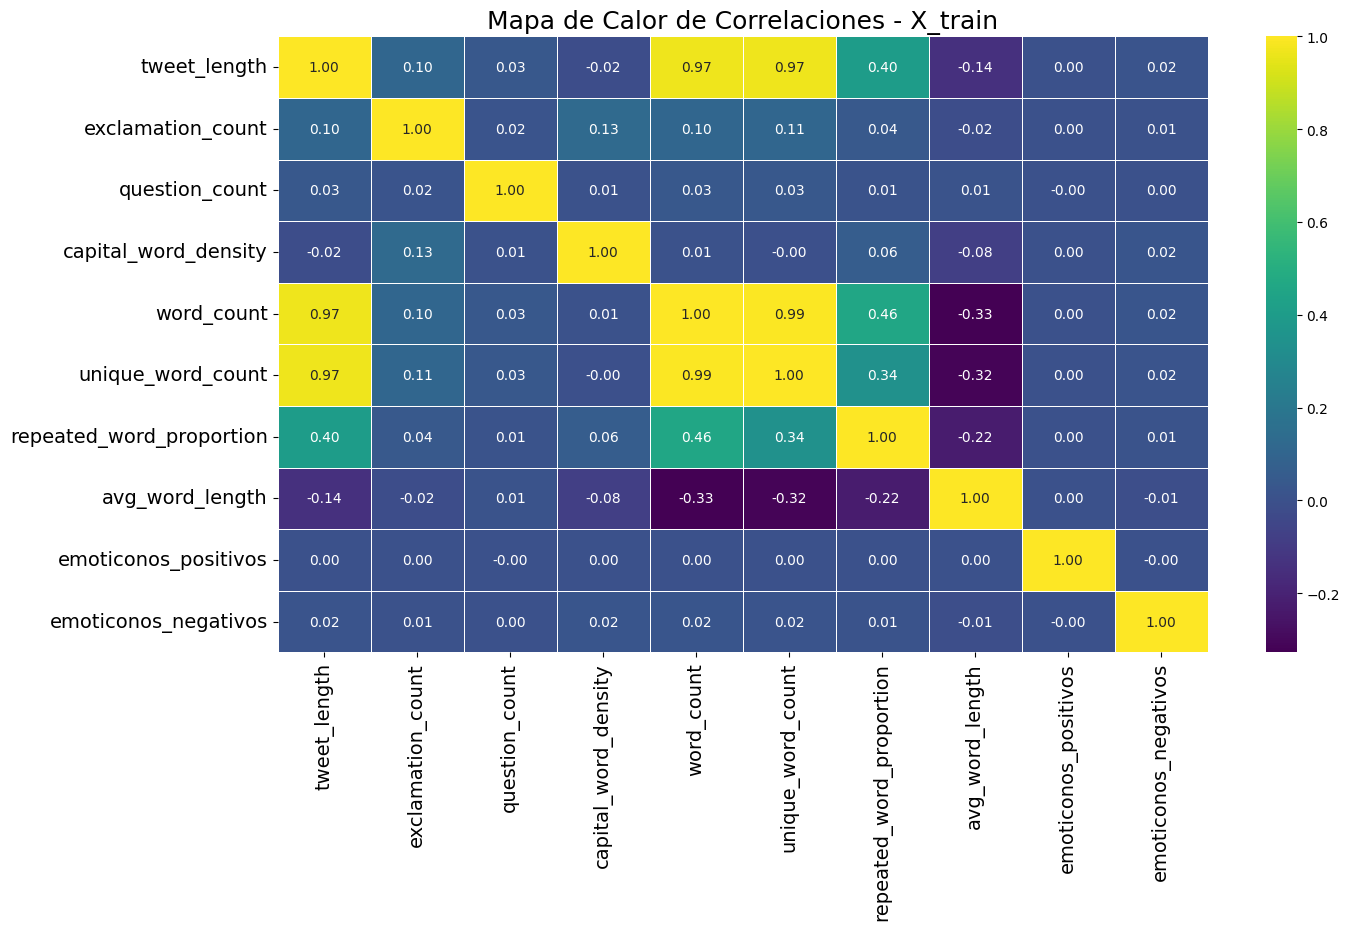

In [ ]:
def generar_mapa_calor(X_train):
    X_train = X_train.drop(columns=['emoji_count', 'punctuation_count', 'mention_count', 'hashtag_count'])
    plt.figure(figsize=(15, 8))
    correlation_matrix = X_train.corr()
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
    heatmap.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Mapa de Calor de Correlaciones - X_train', fontsize=18)
    plt.show()

# Llamar a la función para generar el mapa de calor
generar_mapa_calor(X_train)

Vemos que tweet_lenght tiene una fuerte correlación con las variables word_count y unique_word_count al igual que estas dos tienen una fuerte correlación entre sí, por ende, es esencial tratar con estas. Primero trataremos con las 2 que tienen 0.99, el resto de las variables no parecen tener un correlación significativa ni positivamente ni negativamente.

In [ ]:
X_train = X_train.drop(columns=['word_count',"unique_word_count"])
X_test = X_test.drop(columns=['word_count',"unique_word_count"])

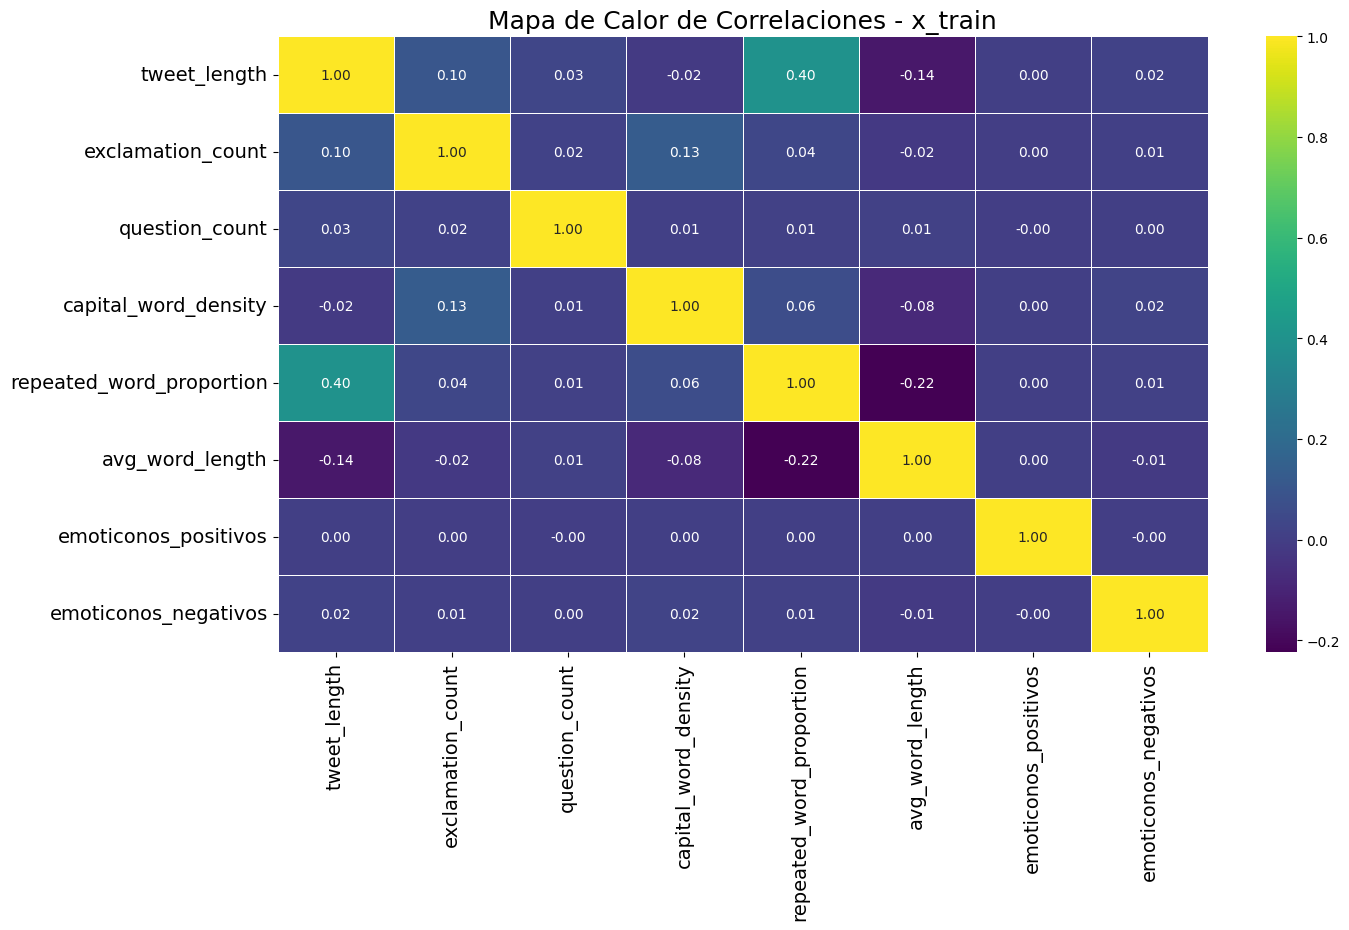

In [ ]:
def generar_mapa_calor(X_train):
    x_train_descarte = X_train.drop(columns=['emoji_count', 'punctuation_count', 'mention_count', 'hashtag_count'])
    plt.figure(figsize=(15, 8))
    correlation_matrix = x_train_descarte.corr()
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
    heatmap.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Mapa de Calor de Correlaciones - x_train', fontsize=18)
    plt.show()

# Llamar a la función para generar el mapa de calor
generar_mapa_calor(X_train)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1054186 entries, 1394925 to 1225567
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   tweet_length              1054186 non-null  int64  
 1   emoji_count               1054186 non-null  int64  
 2   exclamation_count         1054186 non-null  int64  
 3   question_count            1054186 non-null  int64  
 4   capital_word_density      1054186 non-null  float64
 5   repeated_word_proportion  1054186 non-null  float64
 6   punctuation_count         1054186 non-null  int64  
 7   mention_count             1054186 non-null  int64  
 8   hashtag_count             1054186 non-null  int64  
 9   avg_word_length           1054186 non-null  float64
 10  emoticonos_positivos      1054186 non-null  int64  
 11  emoticonos_negativos      1054186 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 104.6 MB


In [ ]:
# Sustituyendo el 4 por el 1 en la variable objetivo tanto para train, test y validación. Por consiguiente sabemos que
y_train.replace({4: 1}, inplace=True)
y_test.replace({4: 1}, inplace=True)
y_val.replace({4: 1}, inplace=True)

In [ ]:
y_train.unique() #verificando que el cambio se realizara, veamos en un gráfico si se mantiene balanceado.

array([1, 0])

Text(0, 0.5, 'Frecuencia')

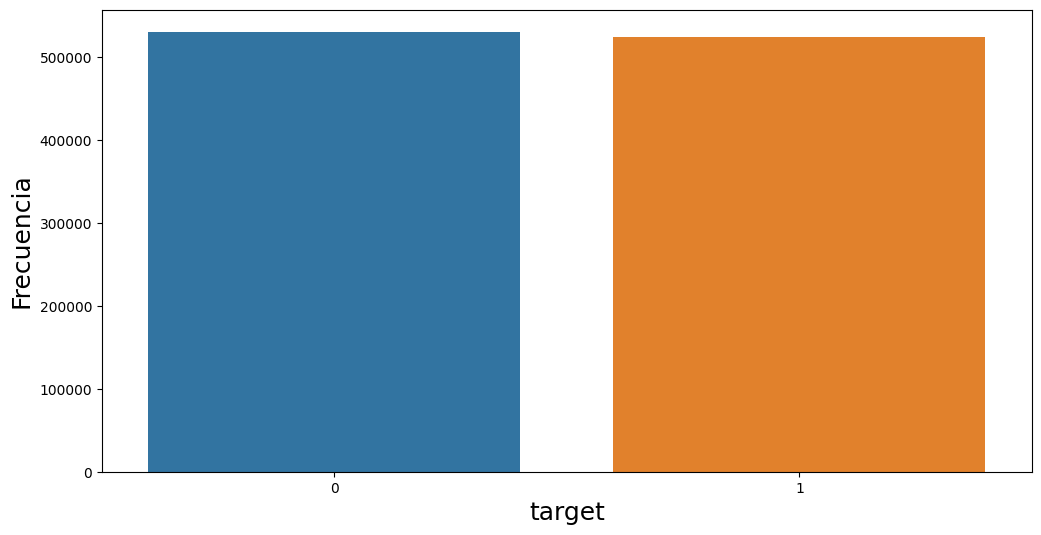

In [ ]:
fig, axs = plt.subplots(figsize=(12, 6))
# Gráfico de barras para y_train
sns.countplot(x=y_train, ax=axs, palette='tab10')
axs.set_xlabel("target", fontsize=18)
axs.set_ylabel("Frecuencia", fontsize=18)

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # Import necesario para Halving
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb

# Definir el modelo base de XGBoost con regularización L1 y L2
xgb_model = xgb.XGBClassifier(eval_metric='auc')

# Definir los hiperparámetros a evaluar, incluyendo reg_alpha y reg_lambda
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 8, 12],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization
    'reg_lambda': [0.5, 1, 1.5, 2]  # L2 regularization
}

# Crear el Halving Grid Search con validación cruzada
halving_search = HalvingGridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    min_resources='exhaust',
    factor=2,
    cv=3,
    verbose=1,
    random_state=101
)

# Tomar una muestra del conjunto de entrenamiento
X_train_sample = X_train.sample(frac=0.1, random_state=101)
y_train_sample = y_train.loc[X_train_sample.index]

# Entrenar el modelo con Halving Grid Search
halving_search.fit(X_train_sample, y_train_sample)

# Ver los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(halving_search.best_params_)

# Mejor puntaje
print("Mejor AUC encontrado:")
print(halving_search.best_score_)

n_iterations: 12
n_required_iterations: 12
n_possible_iterations: 12
min_resources_: 51
max_resources_: 105419
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3888
n_resources: 51
Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
----------
iter: 1
n_candidates: 1944
n_resources: 102
Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
----------
iter: 2
n_candidates: 972
n_resources: 204
Fitting 3 folds for each of 972 candidates, totalling 2916 fits
----------
iter: 3
n_candidates: 486
n_resources: 408
Fitting 3 folds for each of 486 candidates, totalling 1458 fits
----------
iter: 4
n_candidates: 243
n_resources: 816
Fitting 3 folds for each of 243 candidates, totalling 729 fits
----------
iter: 5
n_candidates: 122
n_resources: 1632
Fitting 3 folds for each of 122 candidates, totalling 366 fits
----------
iter: 6
n_candidates: 61
n_resources: 3264
Fitting 3 folds for each of 61 candidates, totalling 183 fits
----------
iter: 7
n_c

Accuracy: 0.5868
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61    113387
           1       0.60      0.53      0.56    112510

    accuracy                           0.59    225897
   macro avg       0.59      0.59      0.59    225897
weighted avg       0.59      0.59      0.59    225897

AUC-ROC: 0.6204


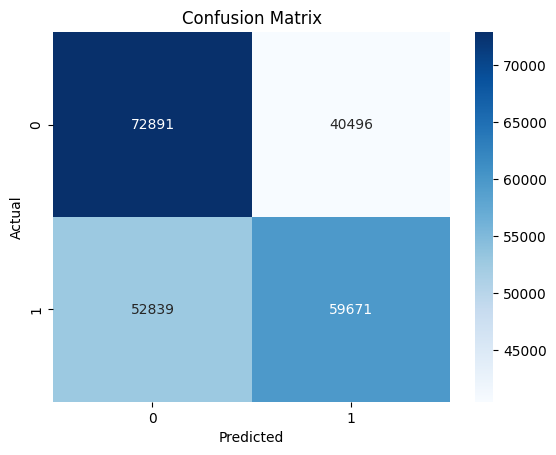

In [ ]:
# Entrenar el modelo con los mejores parámetros
best_xgb_model = xgb.XGBClassifier(
    colsample_bytree=halving_search.best_params_['colsample_bytree'],
    learning_rate=halving_search.best_params_['learning_rate'],
    max_depth=halving_search.best_params_['max_depth'],
    n_estimators=halving_search.best_params_['n_estimators'],
    subsample=halving_search.best_params_['subsample'],
    reg_alpha=halving_search.best_params_['reg_alpha'],   # Añadir reg_alpha
    reg_lambda=halving_search.best_params_['reg_lambda'], # Añadir reg_lambda
    eval_metric='auc'
)

best_xgb_model.fit(X_train, y_train)

# Predecir los valores en el conjunto de test
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Importancia de las características
importances = best_xgb_model.feature_importances_

# Eliminar las columnas no deseadas de X
X = X.drop(columns=['word_count', 'unique_word_count'])

# Crear un DataFrame para mostrar las importancias con sus respectivas variables
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})

# Ordenar las variables por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 variables más importantes
print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

Top 10 Feature Importances:
                    Variable  Importancia
2          exclamation_count     0.656330
9            avg_word_length     0.255380
4       capital_word_density     0.025215
0               tweet_length     0.022366
5   repeated_word_proportion     0.020606
3             question_count     0.013931
11      emoticonos_negativos     0.006172
1                emoji_count     0.000000
6          punctuation_count     0.000000
7              mention_count     0.000000


Accuracy: 0.5868
Classification Report:
              precision    recall  f1-score   support

    Negativo       0.58      0.64      0.61    113387
    Positivo       0.60      0.53      0.56    112510

    accuracy                           0.59    225897
   macro avg       0.59      0.59      0.59    225897
weighted avg       0.59      0.59      0.59    225897



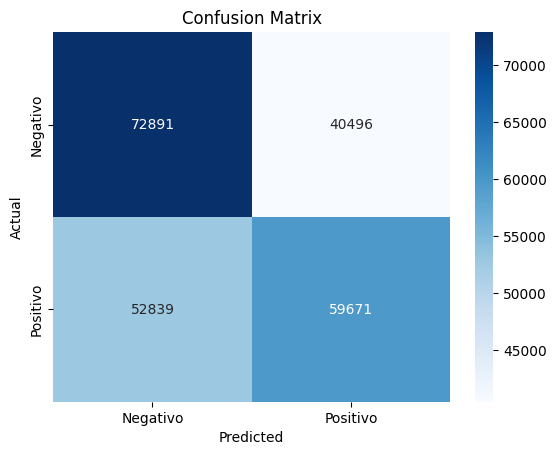

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métrica de precisión global (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Reporte de clasificación
target_names = ['Negativo', 'Positivo']
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generemos un código de implementación y probemos nuestros modelos

In [ ]:
!pip install nltk
!pip install emoji
!pip install numpy pandas seaborn matplotlib scikit-learn
!pip install langdetect
!pip install langid

In [ ]:
import numpy as np
import re
import unicodedata
import string
import emoji
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from multiprocessing import Pool
import nltk
import math
nltk.download('stopwords')
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Ejemplo de texto que deseas predecir
texts = [
    "Bootcamp experience was LIT!!! @alejandro @abel",
    "Had an amazing time at the concert!",
    "The new car model is absolutely fantastic. It drives smoothly and has great fuel efficiency!",
    "I had a terrible experience with the new car model. It broke down after just a week! 😡😠 http://example.com @dealer #fail"
]

# Crear un DataFrame con los textos
df_texts = pd.DataFrame(texts, columns=['text'])
print(df_texts)


# Función de limpieza de texto
def clean_text(text):
    # Normalización Unicode
    text = unicodedata.normalize('NFKD', text)
    # Eliminar caracteres no alfabéticos
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Eliminar espacios al inicio y al final y normalizar espacios múltiples
    text = ' '.join(text.split())
    # Eliminar urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)
    # Eliminar menciones
    text = re.sub(r'@\w+', '', text)
    # Eliminar emojis del tweet original.
    text = emoji.demojize(text)
    return text

# Aplicar limpieza al texto de ejemplo
df_texts['cleaned_text'] = df_texts['text'].apply(clean_text)
print(df_texts)

                                                text
0    Bootcamp experience was LIT!!! @alejandro @abel
1                Had an amazing time at the concert!
2  The new car model is absolutely fantastic. It ...
3  I had a terrible experience with the new car m...
                                                text  \
0    Bootcamp experience was LIT!!! @alejandro @abel   
1                Had an amazing time at the concert!   
2  The new car model is absolutely fantastic. It ...   
3  I had a terrible experience with the new car m...   

                                        cleaned_text  
0         Bootcamp experience was LIT alejandro abel  
1                 Had an amazing time at the concert  
2  The new car model is absolutely fantastic It d...  
3  I had a terrible experience with the new car m...  


In [ ]:
# Función para calcular la longitud del texto
def tweet_length(text):
    return len(text)

df_texts['tweet_length'] = df_texts['cleaned_text'].apply(tweet_length)

# Función para contar emojis
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

df_texts['emoji_count'] = df_texts['text'].apply(count_emojis)

# Funciones para contar signos de exclamación e interrogación
def exclamation_count(text):
    return text.count('!')

def question_count(text):
    return text.count('?')

df_texts['exclamation_count'] = df_texts['text'].apply(exclamation_count)
df_texts['question_count'] = df_texts['text'].apply(question_count)

# Función para calcular densidad de palabras en mayúsculas
def capital_word_density_regex(text):
    words = re.findall(r'\b\w+\b', text)
    total_words = len(words)
    capital_words = sum(1 for word in words if word.isupper())
    if total_words == 0:
        return 0
    return capital_words / total_words

df_texts['capital_word_density'] = df_texts['cleaned_text'].apply(capital_word_density_regex)

# Función para contar palabras usando split()
def word_count_split(text):
    return len(text.split())

df_texts['word_count'] = df_texts['cleaned_text'].apply(word_count_split)

# Función para contar stopwords
stop_words = set(stopwords.words('english'))

def stopword_count(text):
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

df_texts['stopword_count'] = df_texts['cleaned_text'].apply(stopword_count)

# Función para contar palabras únicas
def unique_word_count(text):
    words = text.split()
    return len(set(words))

df_texts['unique_word_count'] = df_texts['cleaned_text'].apply(unique_word_count)

# Función para calcular la proporción de palabras repetidas
def repeated_word_proportion_regex(text):
    words = re.findall(r'\b\w+\b', text)
    total_words = len(words)
    unique_words = len(set(words))
    if total_words == 0:
        return 0
    return (total_words - unique_words) / total_words

df_texts['repeated_word_proportion'] = df_texts['cleaned_text'].apply(repeated_word_proportion_regex)

# Función para contar signos de puntuación
def punctuation_count(text):
    return len(re.findall(r'[^\w\s]', text))

df_texts['punctuation_count'] = df_texts['cleaned_text'].apply(punctuation_count)

# Función para contar menciones
def mention_count(text):
    return len(re.findall(r'@\w+', text))

df_texts['mention_count'] = df_texts['cleaned_text'].apply(mention_count)

# Función para contar hashtags
def hashtag_count(text):
    return len(re.findall(r'#\w+', text))

df_texts['hashtag_count'] = df_texts['cleaned_text'].apply(hashtag_count)

# Función para calcular la longitud promedio de palabras
def avg_word_length(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

df_texts['avg_word_length'] = df_texts['cleaned_text'].apply(avg_word_length)

# Funciones para contar emoticonos positivos y negativos
def count_positivos(text):
    emoticonos_positivos = r'(:\)|:D|:P)'  # Añade los emoticonos positivos
    return len(re.findall(emoticonos_positivos, text))

def count_negativos(text):
    emoticonos_negativos = r'(:\(|D:|:c|:\')'  # Añade los emoticonos negativos
    return len(re.findall(emoticonos_negativos, text))

df_texts['emoticonos_positivos'] = df_texts['text'].apply(count_positivos)
df_texts['emoticonos_negativos'] = df_texts['text'].apply(count_negativos)

In [ ]:
df_texts.head()

,text,cleaned_text,tweet_length,emoji_count,exclamation_count,question_count,capital_word_density,word_count,stopword_count,unique_word_count,repeated_word_proportion,punctuation_count,mention_count,hashtag_count,avg_word_length,emoticonos_positivos,emoticonos_negativos
0,Bootcamp experience was LIT!!! @alejandro @abel,Bootcamp experience was LIT alejandro abel,42,0,3,0,0.166667,6,1,6,0.000000,0,0,0,6.166667,0,0
1,Had an amazing time at the concert!,Had an amazing time at the concert,34,0,1,0,0.000000,7,4,7,0.000000,0,0,0,4.000000,0,0
2,The new car model is absolutely fantastic. It ...,The new car model is absolutely fantastic It d...,90,0,1,0,0.000000,15,5,15,0.000000,0,0,0,5.066667,0,0
3,I had a terrible experience with the new car m...,I had a terrible experience with the new car m...,95,2,1,0,0.052632,19,10,18,0.052632,0,0,0,4.000000,0,0


In [ ]:
# Seleccionar las mismas características que se usaron para entrenar el modelo
features = ['tweet_length', 'emoji_count', 'exclamation_count', 'question_count',
            'capital_word_density', 'repeated_word_proportion', 'punctuation_count',
            'mention_count', 'hashtag_count', 'avg_word_length',
            'emoticonos_positivos', 'emoticonos_negativos']

X_new = df_texts[features]

# Predecir los valores
predictions = best_xgb_model.predict(X_new)
predictions_proba = best_xgb_model.predict_proba(X_new)[:, 1]

# Mostrar las predicciones
for text, prediction, proba in zip(df_texts['text'], predictions, predictions_proba):
    print(f"Texto: {text}")
    print(f"Predicción: {'Positivo' if prediction == 1 else 'Negativo'}")
    print(f"Probabilidad: {proba:.4f}\n")

Texto: Bootcamp experience was LIT!!! @alejandro @abel
Predicción: Positivo
Probabilidad: 0.5987

Texto: Had an amazing time at the concert!
Predicción: Positivo
Probabilidad: 0.5399

Texto: The new car model is absolutely fantastic. It drives smoothly and has great fuel efficiency!
Predicción: Positivo
Probabilidad: 0.5707

Texto: I had a terrible experience with the new car model. It broke down after just a week! 😡😠 http://example.com @dealer #fail
Predicción: Positivo
Probabilidad: 0.5116

